<a href="https://colab.research.google.com/github/Rovidicus/Prediction-of-Product-Sales/blob/main/PredictionofProductSales_LukeH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Luke Hobbs



## Project Overview


## Load and Inspect Data


In [ ]:
# importing necessary packages
import pandas as pd
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Saving the filepath and assigning dataframe as df
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [ ]:
# Previewing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data


In [ ]:
# Presenting number of rows and columns
df.shape

(8523, 12)

In [ ]:
# Identifying datatypes of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Discover and remove duplicates
dup_rows = df.duplicated()
dup_rows.sum()

0

In [ ]:
# Renaming columns to be more presentable with dictionary
rename_dict = {'Item_Identifier': 'Product ID', 'Item_Weight': 'Weight',
                'Item_Fat_Content': 'Fat Content', 'Item_Visibility': 'Percent Visible',
                'Item_Type':'Item Type', 'Item_MRP': 'Max Retail Price', 'Outlet_Identifier': 'Store ID',
                'Outlet_Establishment_Year': 'Year Established', 'Outlet_Size': 'Store Size',
                'Outlet_Location_Type': 'Location Type', 'Outlet_Type': 'Store Type', 'Item_Outlet_Sales': 'Item Store Sales' }
df = df.rename(rename_dict, axis=1)
df.head()

,Product ID,Weight,Fat Content,Percent Visible,Item Type,Max Retail Price,Store ID,Year Established,Store Size,Location Type,Store Type,Item Store Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Checking for how many unique values are in each column
df.nunique()

Product ID          1559
Weight               415
Fat Content            5
Percent Visible     7880
Item Type             16
Max Retail Price    5938
Store ID              10
Year Established       9
Store Size             3
Location Type          3
Store Type             4
Item Store Sales    3493
dtype: int64

In [ ]:
# Adjusting percent Visible to reflect actual percentage
df['Percent Visible'] = df['Percent Visible'].multiply(100)
df['Percent Visible']

0        1.604730
1        1.927822
2        1.676007
3        0.000000
4        0.000000
          ...    
8518     5.678339
8519     4.698243
8520     3.518627
8521    14.522065
8522     4.487828
Name: Percent Visible, Length: 8523, dtype: float64

In [ ]:
df.head()

,Product ID,Weight,Fat Content,Percent Visible,Item Type,Max Retail Price,Store ID,Year Established,Store Size,Location Type,Store Type,Item Store Sales
0,FDA15,9.30,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Identify Missing Values
# Making variable for number of null values
df_nulls = df.isna()
len(df_nulls)

8523

In [ ]:
# Calculating the percentage of null values for each column.
df_null_sum = df_nulls.sum()
null_percent = df_null_sum / len(df) * 100
null_percent

Product ID           0.000000
Weight              17.165317
Fat Content          0.000000
Percent Visible      0.000000
Item Type            0.000000
Max Retail Price     0.000000
Store ID             0.000000
Year Established     0.000000
Store Size          28.276428
Location Type        0.000000
Store Type           0.000000
Item Store Sales     0.000000
dtype: float64

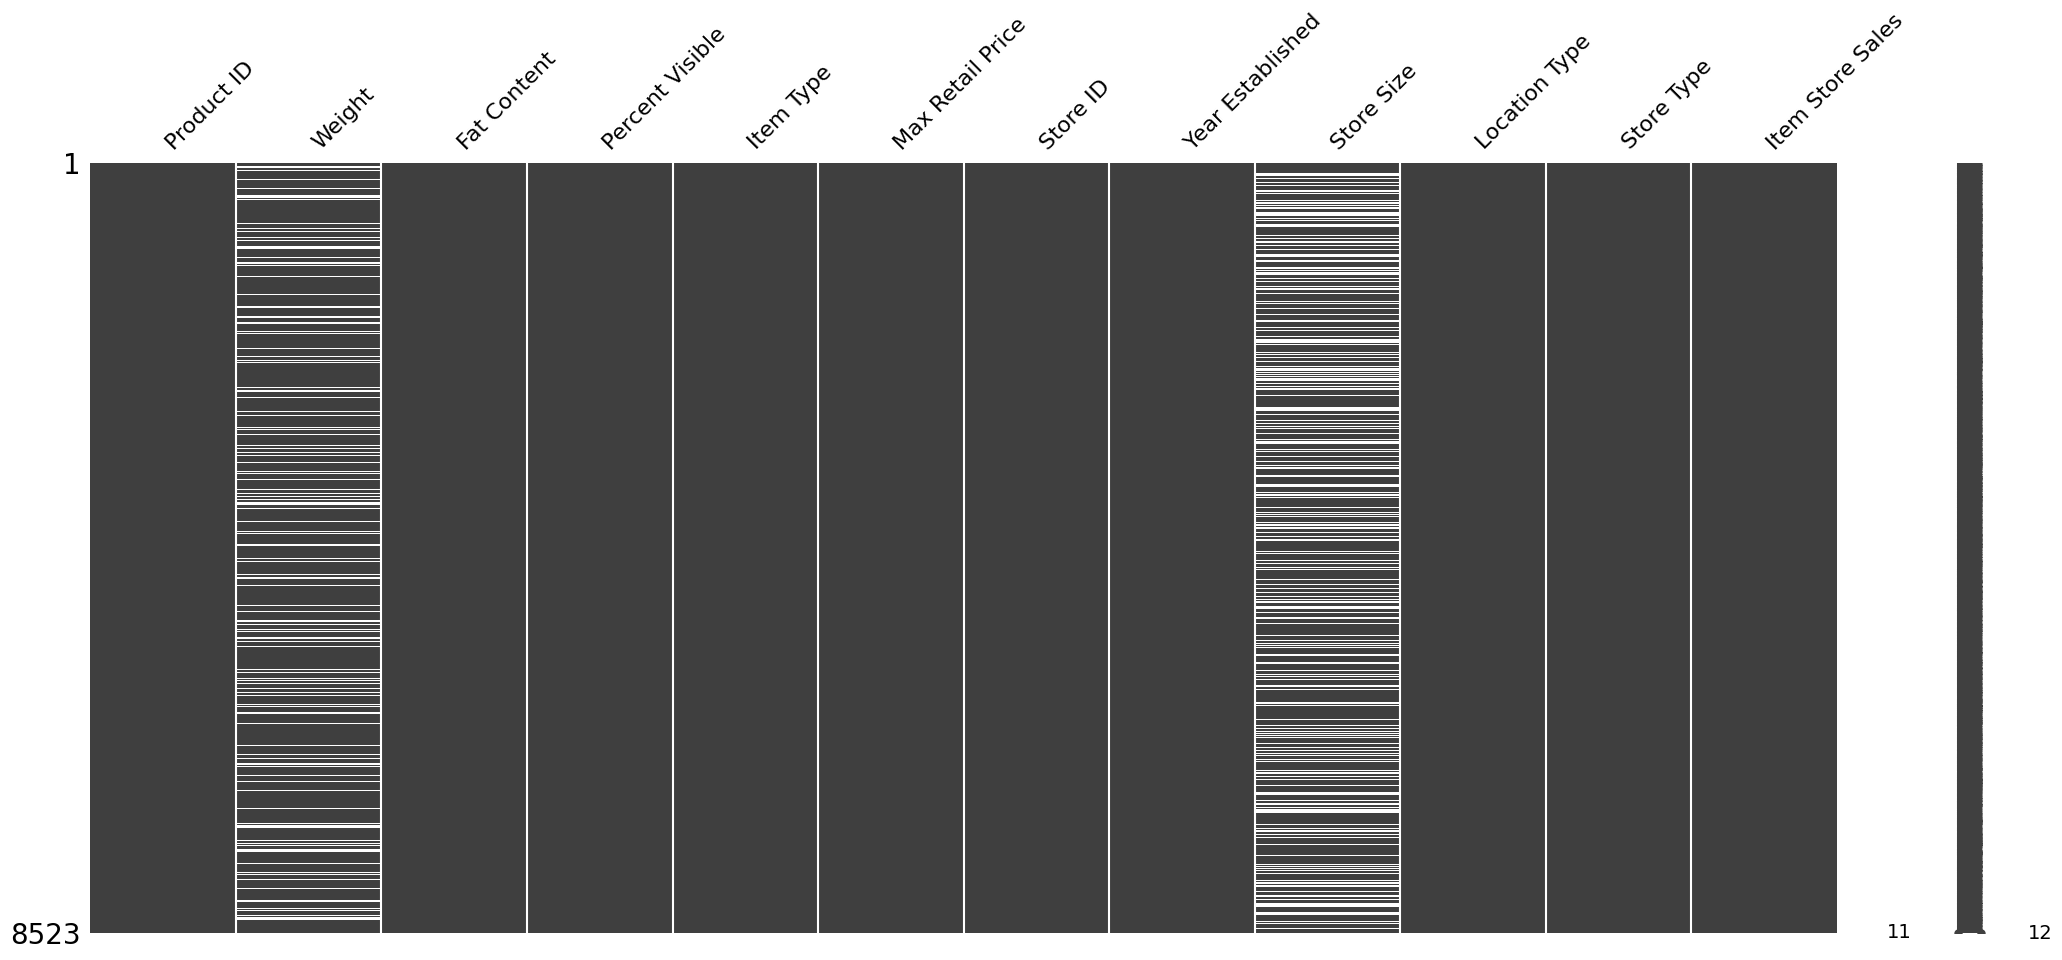

In [ ]:
# Visualizing the missing values using the missingno package.
import missingno as msno
msno.matrix(df);

In [ ]:
# Create placeholder values for columns 'Store Size' and 'Weight'
df['Store Size'] = df['Store Size'].fillna('MISSING')
df['Store Size'].isna().sum()

0

In [ ]:
df['Weight'] = df['Weight'].fillna(-1)
df['Store Size'].isna().sum()

0

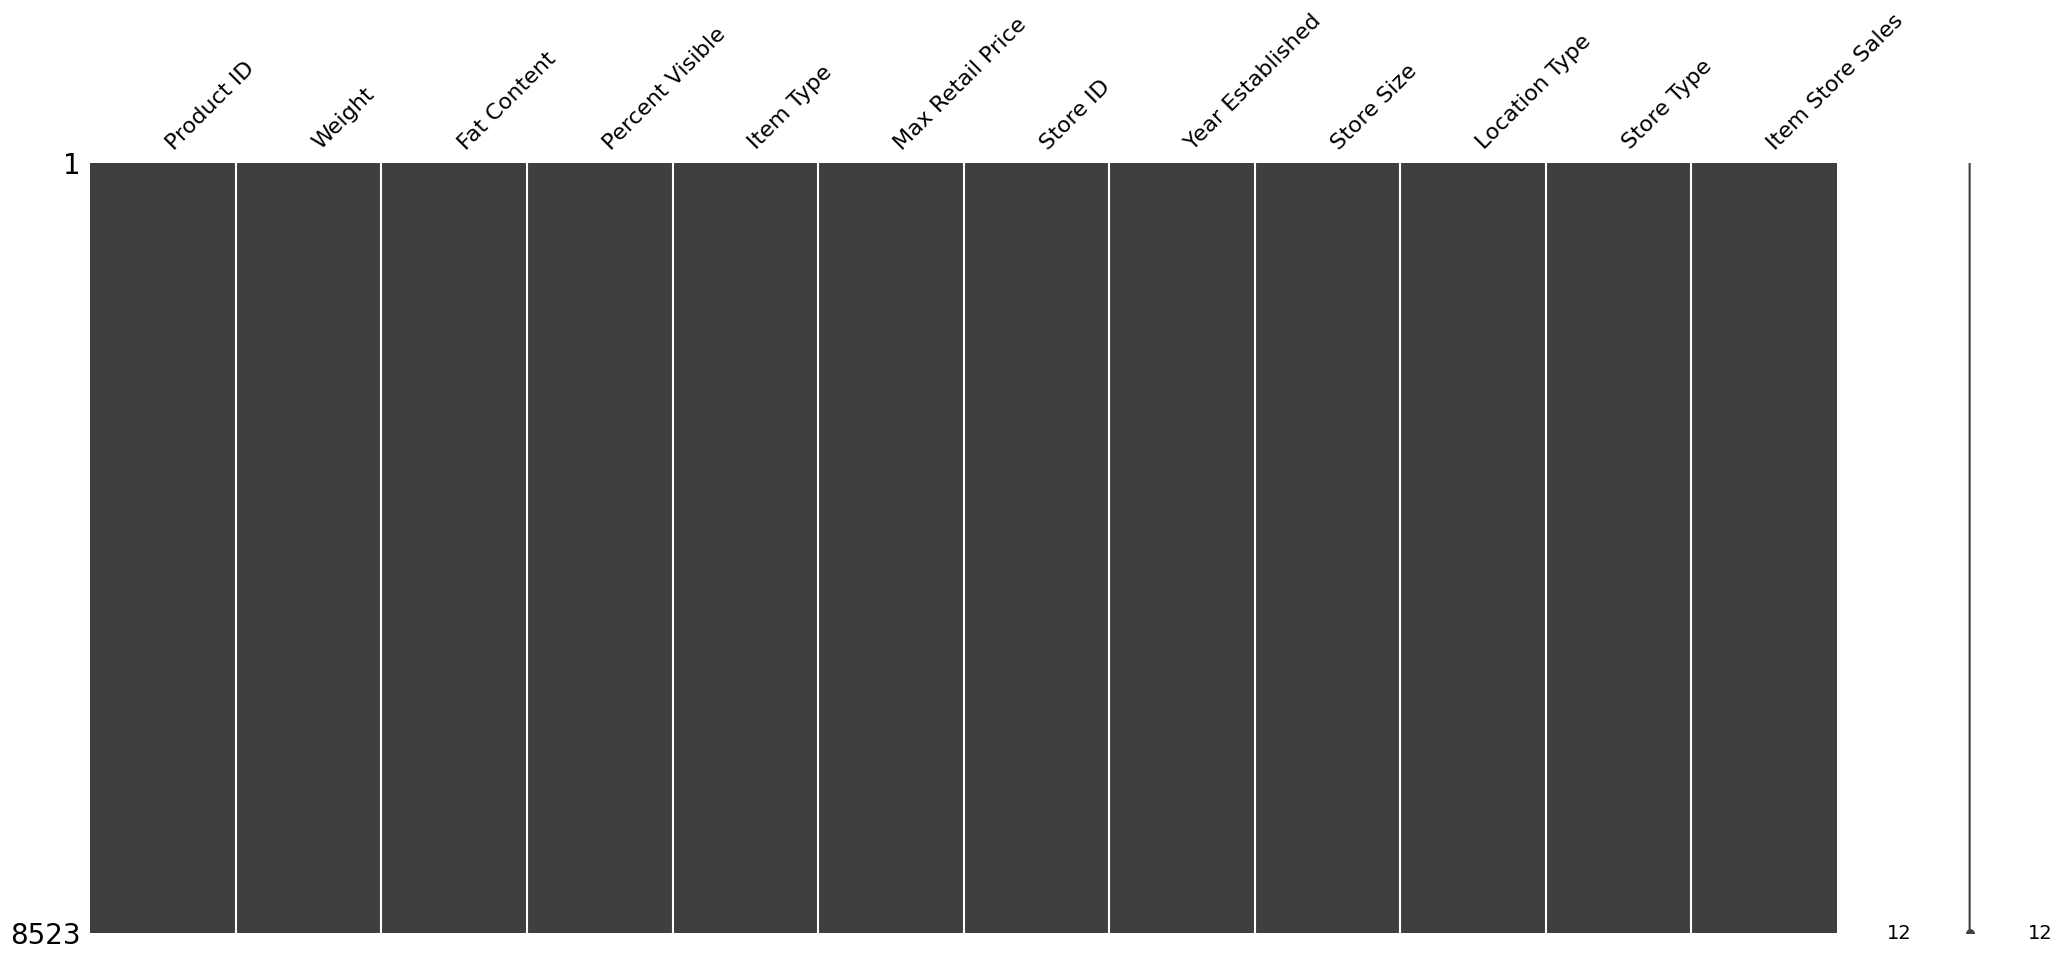

In [ ]:
# Check for missing values in missingno
msno.matrix(df);

In [ ]:
# Find and fix any inconsistent categories of data.
# Saving a list of object columns
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Product ID', 'Fat Content', 'Item Type', 'Store ID', 'Store Size',
       'Location Type', 'Store Type'],
      dtype='object')

In [ ]:
# Check the nunique for just the object cols
obj_cols.nunique()

7

In [ ]:
# looping through the list of string columns
  # printing the value counts for the column and an empty line for readability
for col in obj_cols:
  print(f'The Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

The Value Counts for Product ID
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Product ID, Length: 1559, dtype: int64


The Value Counts for Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Fat Content, dtype: int64


The Value Counts for Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item Type, dtype: int64


The Value Counts for Store ID
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930

In [ ]:
# Reassign 'Fat Content' value 'LF' to 'Low Fat'
df['Fat Content'] = df['Fat Content'].str.replace('LF', 'Low Fat')
df['Fat Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Fat Content, dtype: int64

In [ ]:
# Now reassign 'low fat' to 'Low Fat'
df['Fat Content'] = df['Fat Content'].str.replace('low fat', 'Low Fat')
df['Fat Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Fat Content, dtype: int64

In [ ]:
# Reassigning 'reg' to 'Regular'
df['Fat Content'] = df['Fat Content'].str.replace('reg', 'Regular')
df['Fat Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Fat Content, dtype: int64

In [ ]:
# Reassign value name 'High' in 'Store Size' column to more appropriate name: 'Large'
df['Store Size'] = df['Store Size'].str.replace('High', 'Large')
df['Store Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Store Size, dtype: int64

In [ ]:
# Save a list of number columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Weight', 'Percent Visible', 'Max Retail Price', 'Year Established',
       'Item Store Sales'],
      dtype='object')

In [ ]:
# Check the nunique for just the object cols
num_cols.nunique()

5

In [ ]:
# looping through the list of string columns
  # printing the value counts for the column and an empty line for readability.

for col in num_cols:
  print(f'The Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

The Value Counts for Weight
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Weight, Length: 416, dtype: int64


The Value Counts for Percent Visible
0.000000     526
7.697512       3
16.246204      2
7.684109       2
7.356248       2
            ... 
1.395731       1
11.045983      1
12.464554      1
5.414209       1
4.487828       1
Name: Percent Visible, Length: 7880, dtype: int64


The Value Counts for Max Retail Price
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Max Retail Price, Length: 5938, dtype: int64


The Value Counts for Year Established
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Year Established, dtype: int64


The Value Counts for Item Store Sales
9

In [ ]:
# Set index to relevant identifying column: Product ID
df = df.set_index('Product ID')
df

,Weight,Fat Content,Percent Visible,Item Type,Max Retail Price,Store ID,Year Established,Store Size,Location Type,Store Type,Item Store Sales
Product ID,,,,,,,,,,,
FDA15,9.300,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,Low Fat,5.678339,Snack Foods,214.5218,OUT013,1987,Large,Tier 3,Supermarket Type1,2778.3834
FDS36,8.380,Regular,4.698243,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
NCJ29,10.600,Low Fat,3.518627,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [ ]:
# Display the min, the max and the average of the numerical columns
df[num_cols].describe()

,Weight,Percent Visible,Max Retail Price,Year Established,Item Store Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,6.613203,140.992782,1997.831867,2181.288914
std,6.720742,5.159782,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,2.698948,93.826500,1987.000000,834.247400
50%,11.000000,5.393093,143.012800,1999.000000,1794.331000
75%,16.000000,9.458529,185.643700,2004.000000,3101.296400
max,21.350000,32.839095,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [ ]:
# Importing useful packages
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Beginning to explore numerical features of data. Pulling up numeric columns.
df.select_dtypes(include='number')

,Weight,Percent Visible,Max Retail Price,Year Established,Item Store Sales
Product ID,,,,,
FDA15,9.300,1.604730,249.8092,1999,3735.1380
DRC01,5.920,1.927822,48.2692,2009,443.4228
FDN15,17.500,1.676007,141.6180,1999,2097.2700
FDX07,19.200,0.000000,182.0950,1998,732.3800
NCD19,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
FDF22,6.865,5.678339,214.5218,1987,2778.3834
FDS36,8.380,4.698243,108.1570,2002,549.2850
NCJ29,10.600,3.518627,85.1224,2004,1193.1136


In [ ]:
# Pulling categorical columns for future reference
df.select_dtypes(include='object')

,Fat Content,Item Type,Store ID,Store Size,Location Type,Store Type
Product ID,,,,,,
FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
NCD19,Low Fat,Household,OUT013,Large,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
FDF22,Low Fat,Snack Foods,OUT013,Large,Tier 3,Supermarket Type1
FDS36,Regular,Baking Goods,OUT045,MISSING,Tier 2,Supermarket Type1
NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1


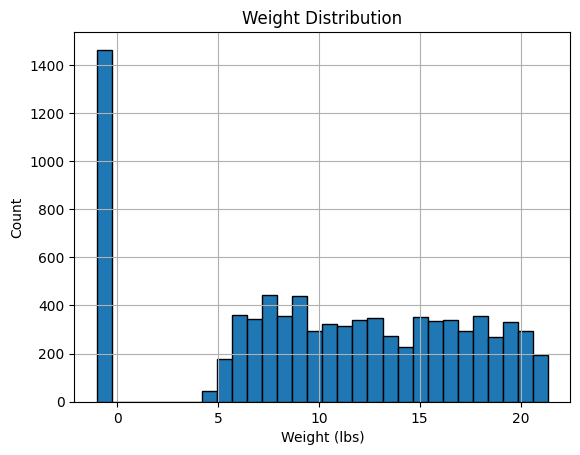

In [ ]:
# Making three histograms of Weight, Max Retail Price and Item Store Sales
ax_hist_w = df['Weight'].hist(bins=30, edgecolor='black')
ax_hist_w.set(title = "Weight Distribution", xlabel = 'Weight (lbs)', ylabel = "Count");

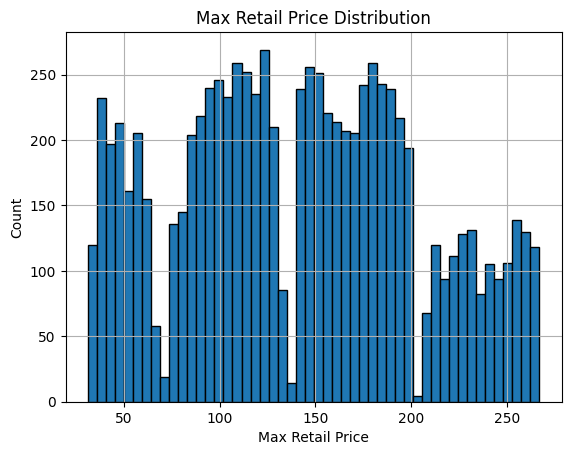

In [ ]:
ax_hist_mrp = df['Max Retail Price'].hist(bins=50, edgecolor = 'black')
ax_hist_mrp.set(title = "Max Retail Price Distribution", xlabel = 'Max Retail Price', ylabel = "Count");

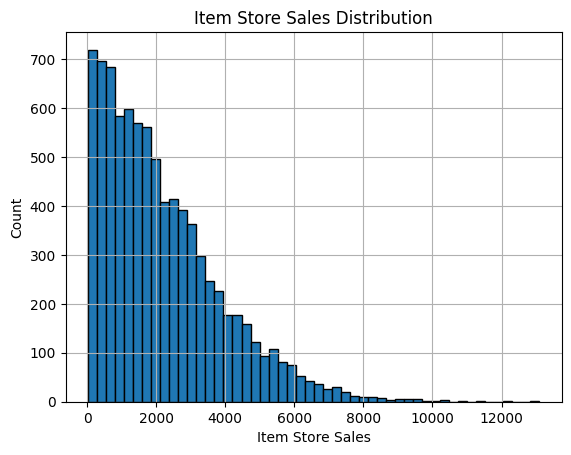

In [ ]:
ax_hist_iss = df['Item Store Sales'].hist(bins = 50, edgecolor = 'black')
ax_hist_iss.set(title = "Item Store Sales Distribution", xlabel = 'Item Store Sales', ylabel = "Count");

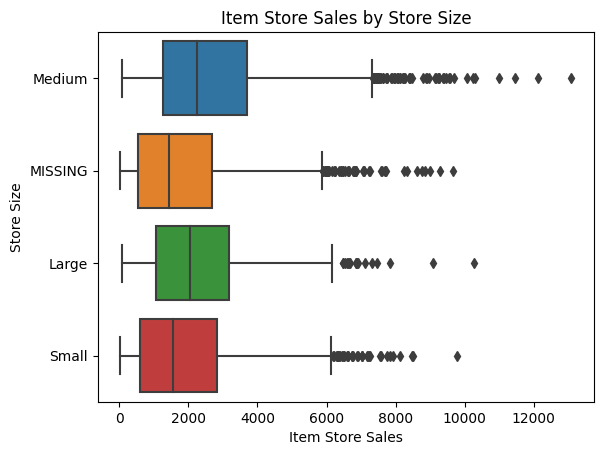

In [ ]:
# Grouping by store size and sales numbers
ax = sns.boxplot(data=df, x = 'Item Store Sales', y = 'Store Size')
ax.set(title = "Item Store Sales by Store Size");

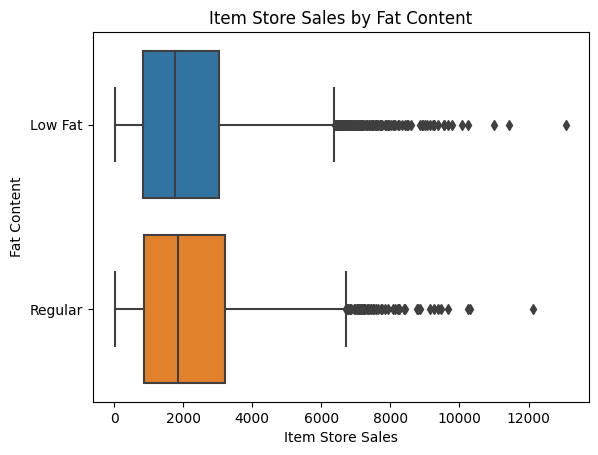

In [ ]:
# Grouping by weight and fat content
ax = sns.boxplot(data=df, x = 'Item Store Sales', y = 'Fat Content')
ax.set(title = "Item Store Sales by Fat Content");

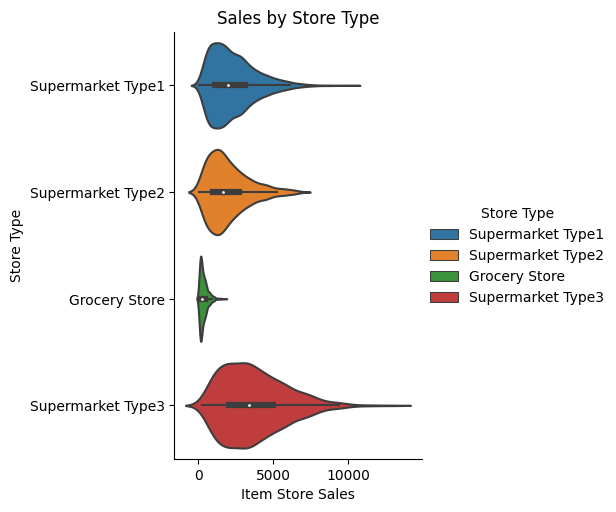

In [ ]:
# Making violin plot of Item Store Sales by Store Type
g = sns.catplot(data=df, x = 'Item Store Sales', y = 'Store Type', hue = 'Store Type', kind = 'violin', dodge=False)
g.set(title = "Sales by Store Type");

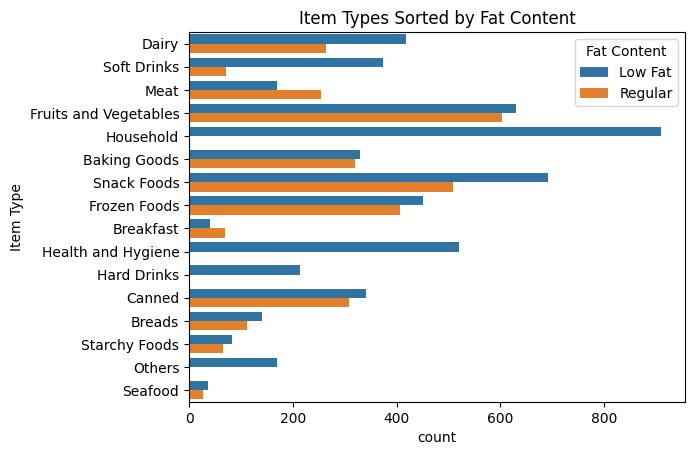

In [ ]:
# Need countplots to view the frequency of each class of categorial features in dataset
ax = sns.countplot(data = df, y = 'Item Type', hue = 'Fat Content')
ax.set_title("Item Types Sorted by Fat Content");

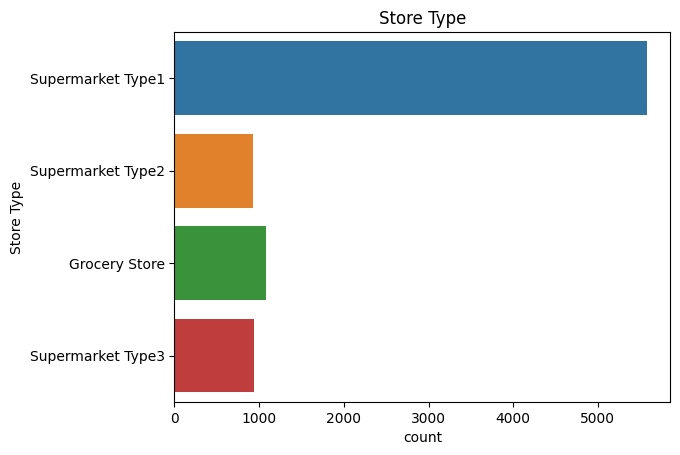

In [ ]:
ax = sns.countplot(data=df, y = "Store Type")
ax.set_title("Store Type");

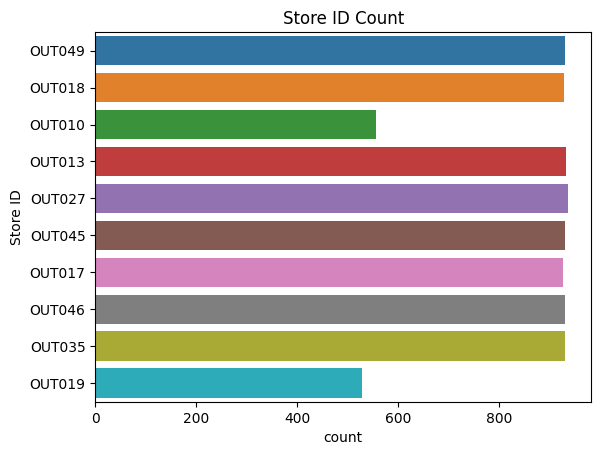

In [ ]:
ax = sns.countplot(data=df, y = "Store ID")
ax.set(title = "Store ID Count");

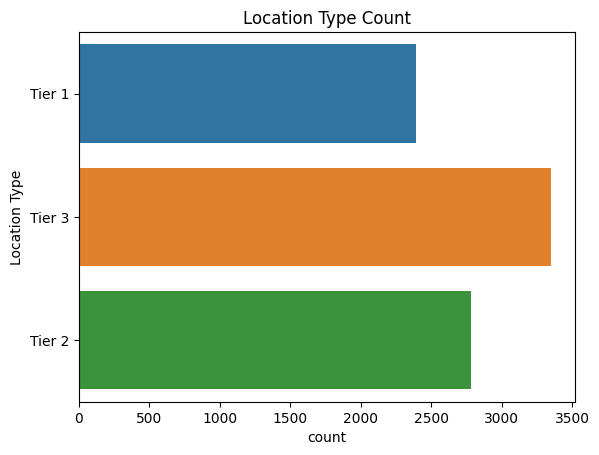

In [ ]:
ax = sns.countplot(data=df, y = "Location Type")
ax.set(title = "Location Type Count");

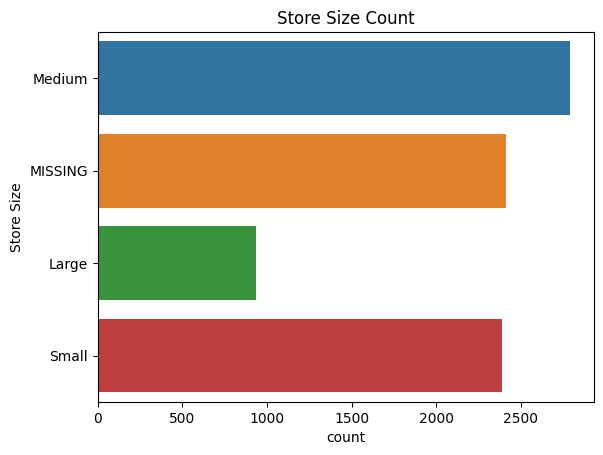

In [ ]:
ax = sns.countplot(data=df, y = "Store Size")
ax.set(title = "Store Size Count");

In [ ]:
# Making heatmap to view correlation between numeric data
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Weight,Percent Visible,Max Retail Price,Year Established,Item Store Sales
Weight,1.00,-0.08,0.02,0.54,-0.06
Percent Visible,-0.08,1.00,-0.00,-0.07,-0.13
Max Retail Price,0.02,-0.00,1.00,0.01,0.57
Year Established,0.54,-0.07,0.01,1.00,-0.05
Item Store Sales,-0.06,-0.13,0.57,-0.05,1.00


<ipython-input-95-5f85a41b7a63>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))


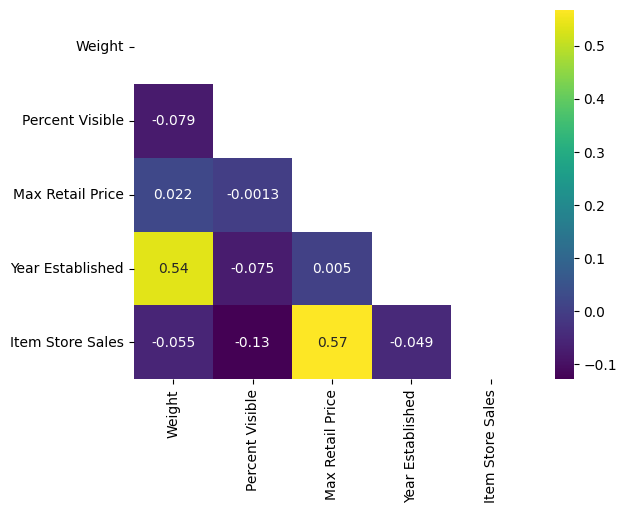

In [ ]:
# Make a heatmap of correlations
# creating mask
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(corr, cmap = 'viridis', annot = True, mask=mask);

## Feature Inspection

### Target: Item Store Sales

In [ ]:
# Remove the placeholder features with null values
# Reviewing code, the following snippets are what I used to replace nulls
## df['Store Size'] = df['Store Size'].fillna('MISSING')
## df['Weight'] = df['Weight'].fillna(-1)
df['Store Size'].dtype

dtype('O')

In [ ]:
df['Store Size'] = df['Store Size'].replace('MISSING', np.nan, regex=True)
df['Store Size'].isna().sum()

2410

In [ ]:
df['Weight'].dtype

dtype('float64')

In [ ]:
df['Weight'] = df['Weight'].replace(-1, np.nan, regex=True)
df['Weight'].isna().sum()

1463

In [ ]:
df.head()

,Weight,Fat Content,Percent Visible,Item Type,Max Retail Price,Store ID,Year Established,Store Size,Location Type,Store Type,Item Store Sales
Product ID,,,,,,,,,,,
FDA15,9.30,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [102]:
# Importing snippets of relevant custom functions for univariate and multivariate analyses.

In [103]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [104]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item Store Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item Store Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [105]:
df.head()

,Weight,Fat Content,Percent Visible,Item Type,Max Retail Price,Store ID,Year Established,Store Size,Location Type,Store Type,Item Store Sales
Product ID,,,,,,,,,,,
FDA15,9.30,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


# Dictionary
1. Variable Name	- Description
2. Item_Identifier	- Product ID
3. Item_Weight	- Weight of product
4. Item_Fat_Content - Whether the product is low-fat or regular
5. Item_Visibility	- The percentage of total display area of all products in a store allocated to the particular product
6. Item_Type	- The category to which the product belongs
7. Item_MRP - Maximum Retail Price (list price) of the product
8. Outlet_Identifier - Store ID
9. Outlet_Establishment_Year - The year in which store was established
10. Outlet_Size	- The size of the store in terms of ground area covered
11. Outlet_Location_Type - The type of area in which the store is located
12. Outlet_Type - Whether the outlet is a grocery store or some sort of supermarket
13. Item_Outlet_Sales - Sales of the product in the particular store. This is the target variable to be predicted.

# For each feature:

1. Add a new markdown header.
2. Paste the feature's definition from the data dictionary into a markdown cell.
3. Create a univariate visualization showing the distribution of values/categories.
- You may use the EDA functions from the previous lessons or create your own visualizations.
4. Answer the following questions from the Feature Inspection lesson in a markdown cell:
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- Is the feature constant or quasi-constant?
- What is the cardinality? Is it high (>10)?
- Would we know this feature before the target is determined?
- Is there a business case/understanding reason to exclude based on our business case?
5. Create a multivariate visualization plotting each feature vs. the target.
- You may use the EDA functions from the previous lessons or create your own visualizations.​
6. Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
- Does this feature appear to be a predictor of the target?

In [135]:
df.drop_duplicates(subset="Weight")

,Weight,Fat Content,Percent Visible,Item Type,Max Retail Price,Store ID,Year Established,Store Size,Location Type,Store Type,Item Store Sales
Product ID,,,,,,,,,,,
FDA15,9.300,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
NCU53,5.485,Low Fat,7.155777,Health and Hygiene,165.7842,OUT010,1998,NaN,Tier 3,Grocery Store,165.7842
FDE38,6.520,Low Fat,4.460716,Canned,164.2842,OUT046,1997,Small,Tier 1,Supermarket Type1,2818.3314
DRC49,8.670,Low Fat,6.543658,Soft Drinks,142.9128,OUT046,1997,Small,Tier 1,Supermarket Type1,2013.3792


In [159]:
df.duplicated().sum()

AttributeError: ignored

# Weight
- Weight of product


In [158]:
explore_numeric(df, 'Weight')

TypeError: ignored

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- Is the feature constant or quasi-constant?
- What is the cardinality? Is it high (>10)?
- Would we know this feature before the target is determined?
- Is there a business case/understanding reason to exclude based on our business case?

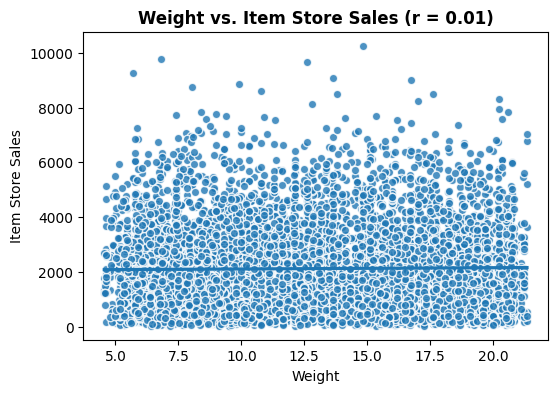

In [138]:
plot_numeric_vs_target(df, 'Weight');

- Based on your business understanding, would you expect this feature to be a predictor of the target? **No**
- Does this feature appear to be a predictor of the target? **It does not. Values are all over the place with no clear correlation**

# Fat Content
- Whether the product is low-fat or regular

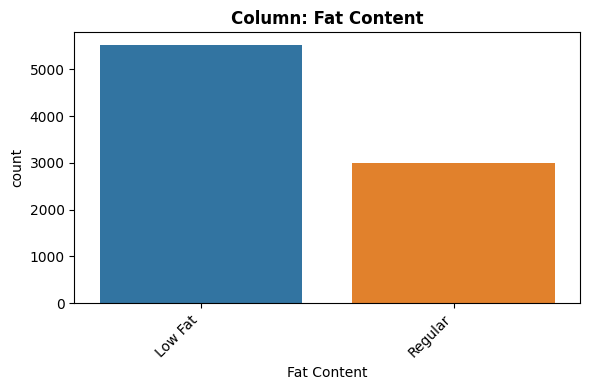

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Fat Content'}, xlabel='Fat Content', ylabel='count'>)

In [113]:
explore_categorical(df, 'Fat Content')

- What type of feature is it? **Nominal**
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) **None**
- Is the feature constant or quasi-constant? **No**
- What is the cardinality? Is it high (>10)? **Low at 2**
- Would we know this feature before the target is determined? **Yes**
- Is there a business case/understanding reason to exclude based on our business case? **No**

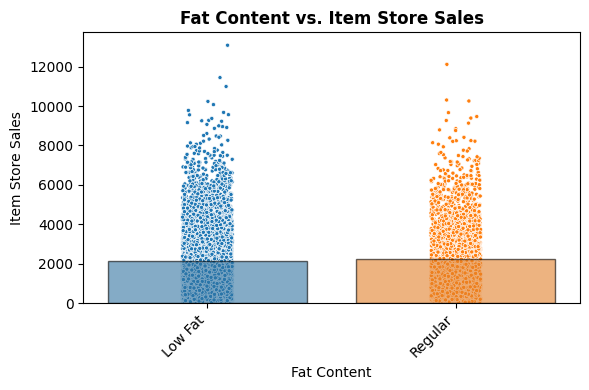

In [139]:
plot_categorical_vs_target(df, 'Fat Content');

- Based on your business understanding, would you expect this feature to be a predictor of the target? **I would expect lowfat to outperform**
- Does this feature appear to be a predictor of the target? **On the contrary they seem even despite far more Low Fat items**

# Percent Visible
- The percentage of total display area of all products in a store allocated to the particular product

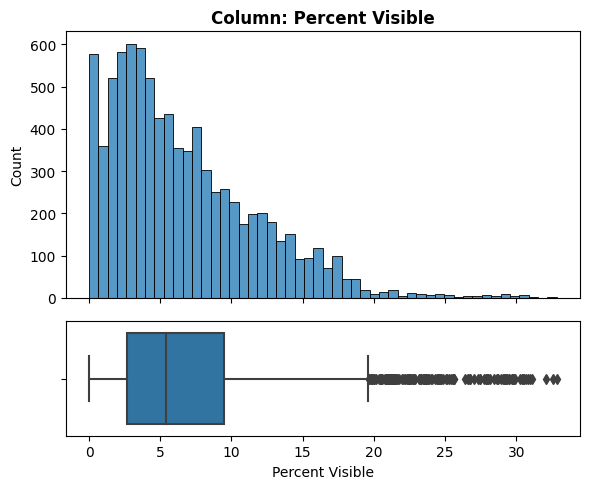

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Percent Visible'}, xlabel='Percent Visible', ylabel='Count'>,
        <Axes: xlabel='Percent Visible'>], dtype=object))

In [115]:
explore_numeric(df, 'Percent Visible')

- What type of feature is it? **numeric**
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) **0**
- Is the feature constant or quasi-constant? **No**
- What is the cardinality? Is it high (>10)? **Doesn't apply**
- Would we know this feature before the target is determined? **Yes**
- Is there a business case/understanding reason to exclude based on our business case? **No**

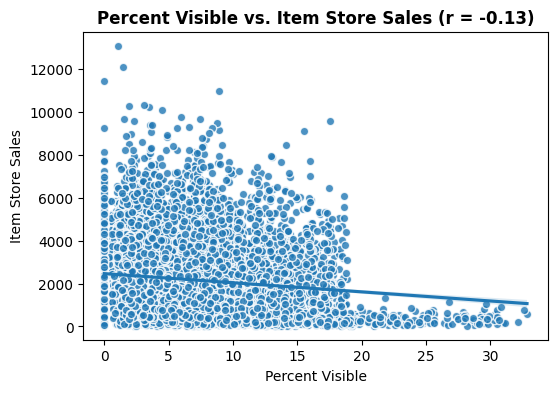

In [140]:
plot_numeric_vs_target(df, 'Percent Visible');

- Based on your business understanding, would you expect this feature to be a predictor of the target? **I would expect positive correlation**
- Does this feature appear to be a predictor of the target? **It's slightly negatively correlated.**

# Item Type
- The category to which the product belongs

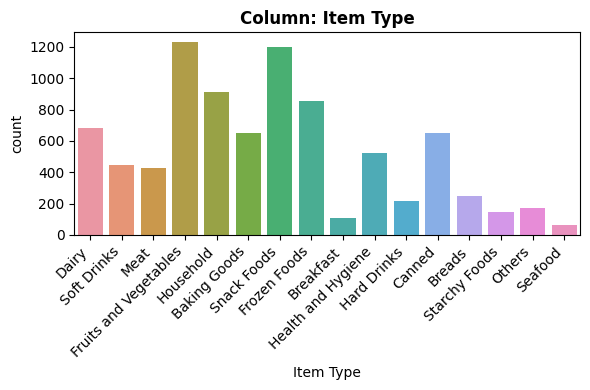

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item Type'}, xlabel='Item Type', ylabel='count'>)

In [117]:
explore_categorical(df, 'Item Type')

- What type of feature is it? **Nominal**
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) **0**
- Is the feature constant or quasi-constant? **No**
- What is the cardinality? Is it high (>10)? **Yes, at 16**
- Would we know this feature before the target is determined? **Yes**
- Is there a business case/understanding reason to exclude based on our business case? **No**

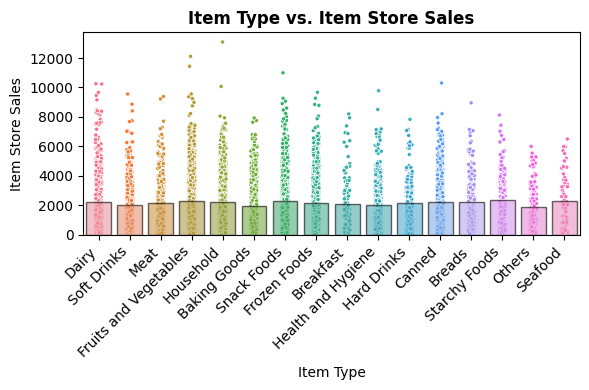

In [141]:
plot_categorical_vs_target(df, 'Item Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target? **Definitely**
- Does this feature appear to be a predictor of the target? **Yes, there is some fluctuation**

# Max Retail Price
- Maximum Retail Price (list price) of the product

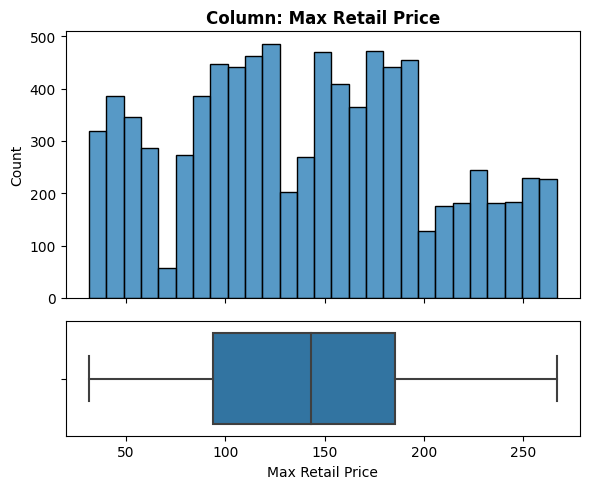

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Max Retail Price'}, xlabel='Max Retail Price', ylabel='Count'>,
        <Axes: xlabel='Max Retail Price'>], dtype=object))

In [119]:
explore_numeric(df, 'Max Retail Price')

- What type of feature is it? **Numeric**
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) **0**
- Is the feature constant or quasi-constant? **No**
- What is the cardinality? Is it high (>10)? **Doesn't apply**
- Would we know this feature before the target is determined? **Yes**
- Is there a business case/understanding reason to exclude based on our business case? **No**

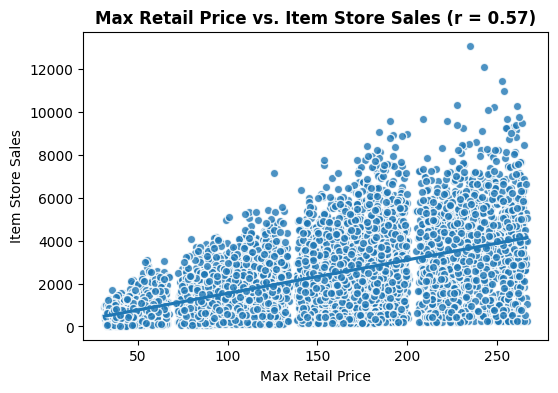

In [120]:
plot_numeric_vs_target(df, 'Max Retail Price');

- Based on your business understanding, would you expect this feature to be a predictor of the target? **Yes, slightly positive**
- Does this feature appear to be a predictor of the target? **It's a dramatically positive correlation**

# Store ID
- Outlet_Identifier

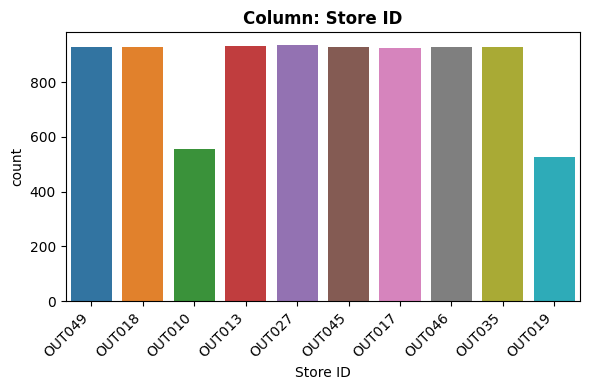

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Store ID'}, xlabel='Store ID', ylabel='count'>)

In [121]:
explore_categorical(df, "Store ID")

- What type of feature is it? **Nominal**
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) **0**
- Is the feature constant or quasi-constant? **No**
- What is the cardinality? Is it high (>10)? **At 10, not high**
- Would we know this feature before the target is determined? **Yes**
- Is there a business case/understanding reason to exclude based on our business case? **No**

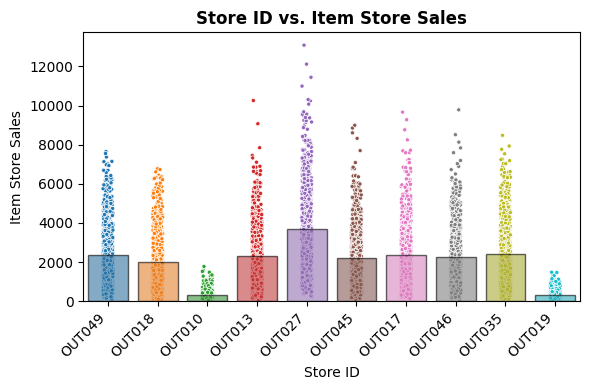

In [122]:
plot_categorical_vs_target(df, "Store ID");

- Based on your business understanding, would you expect this feature to be a predictor of the target? **I expect some small fluctuation**
- Does this feature appear to be a predictor of the target? **Yes, with much difference between them**

# Year Established
- The year in which store was established

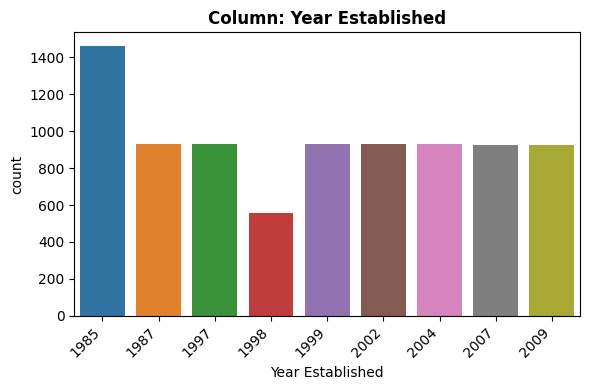

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Year Established'}, xlabel='Year Established', ylabel='count'>)

In [123]:
explore_categorical(df, "Year Established")

- What type of feature is it? **Ordinal**
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) **0**
- Is the feature constant or quasi-constant? **No**
- What is the cardinality? Is it high (>10)? **No, 9**
- Would we know this feature before the target is determined? **Yes**
- Is there a business case/understanding reason to exclude based on our business case? **No**

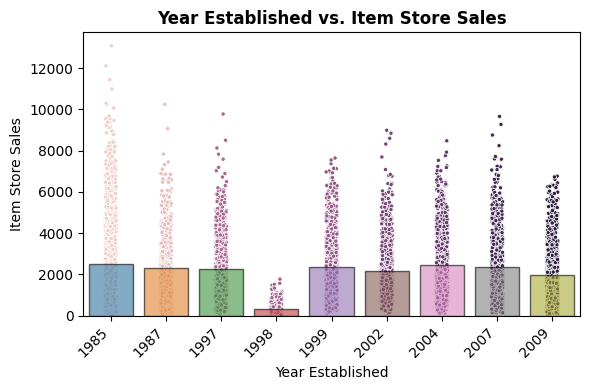

In [124]:
plot_categorical_vs_target(df, "Year Established");

- Based on your business understanding, would you expect this feature to be a predictor of the target? **Not really**
- Does this feature appear to be a predictor of the target? **To a mild extent. What's telling is 1998 and begs question as to why that store is struggling

# Store Size
- The size of the store in terms of ground area covered

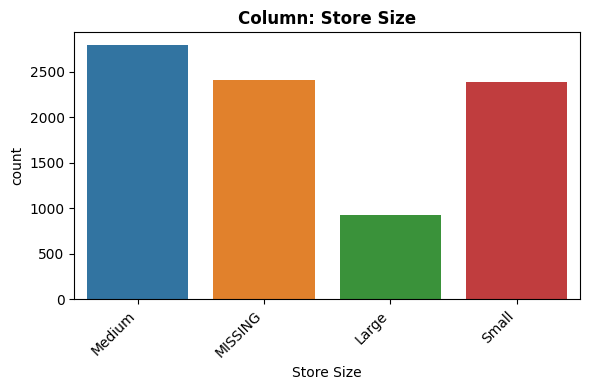

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Store Size'}, xlabel='Store Size', ylabel='count'>)

In [125]:
explore_categorical(df, "Store Size")

- What type of feature is it? **Ordinal**
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) **2410 (28.28%), replaced with placeholder MISSING**
- Is the feature constant or quasi-constant? **No**
- What is the cardinality? Is it high (>10)? **No, at 4**
- Would we know this feature before the target is determined? **Yes**
- Is there a business case/understanding reason to exclude based on our business case? **No**

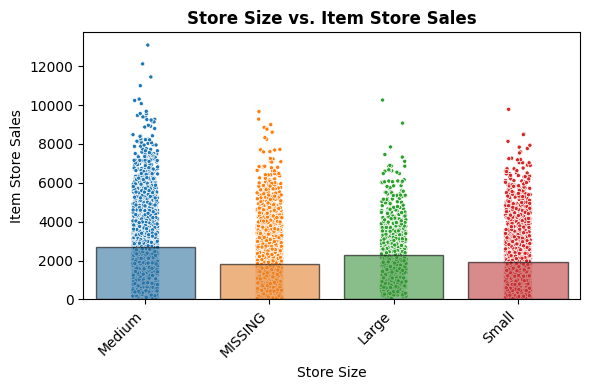

In [126]:
plot_categorical_vs_target(df, "Store Size");

- Based on your business understanding, would you expect this feature to be a predictor of the target? **I would think a positive correlation from small to large**
- Does this feature appear to be a predictor of the target? **Medium is the high performer, interestingly. It's unfortunate so much data is missing however**

# Location Type
- The type of area in which the store is located

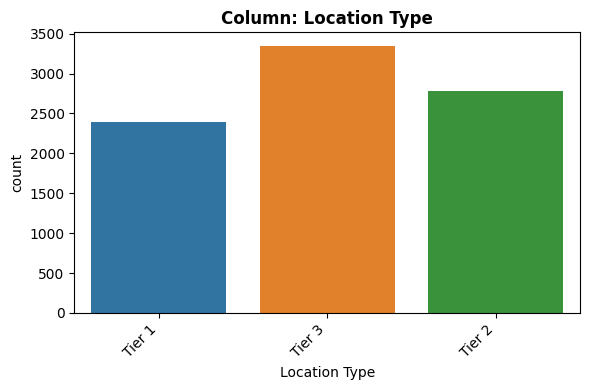

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Location Type'}, xlabel='Location Type', ylabel='count'>)

In [127]:
explore_categorical(df, "Location Type")

- What type of feature is it? **Ordinal**
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) **0**
- Is the feature constant or quasi-constant? **No**
- What is the cardinality? Is it high (>10)? **No, at 3**
- Would we know this feature before the target is determined? **Yes**
- Is there a business case/understanding reason to exclude based on our business case? **No**

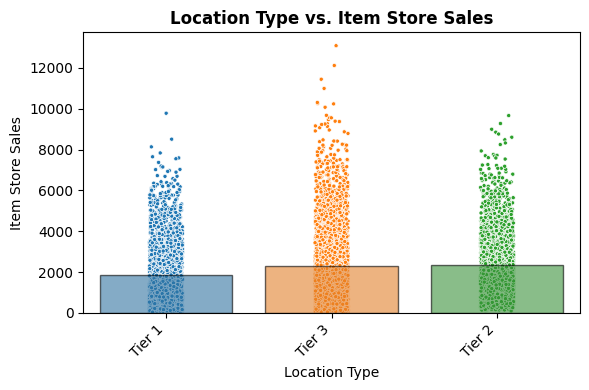

In [128]:
plot_categorical_vs_target(df, "Location Type");

- Based on your business understanding, would you expect this feature to be a predictor of the target? **Yes, location should have an effect on sales**
- Does this feature appear to be a predictor of the target? **A little, Tier 1 seems consistently poorer, 2 and 3 bring in similar sales**

# Store Type
- Whether the outlet is a grocery store or some sort of supermarket

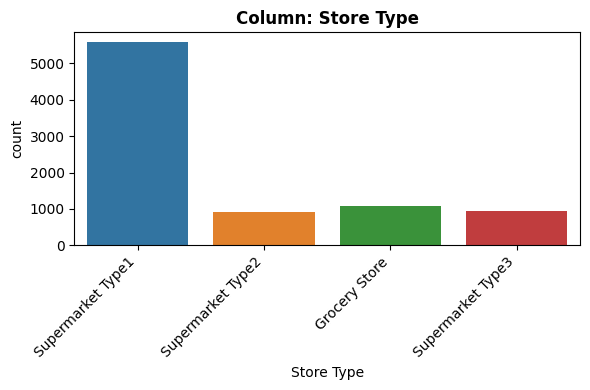

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Store Type'}, xlabel='Store Type', ylabel='count'>)

In [129]:
explore_categorical(df, "Store Type")

- What type of feature is it? **Categorical**
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) **0**
- Is the feature constant or quasi-constant? **No**
- What is the cardinality? Is it high (>10)? **No, at 4**
- Would we know this feature before the target is determined? **Yes**
- Is there a business case/understanding reason to exclude based on our business case? **No**

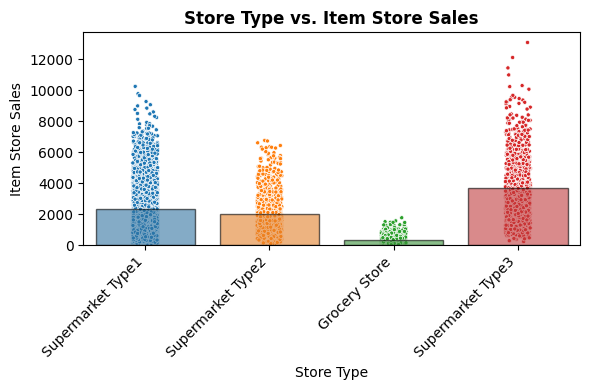

In [130]:
plot_categorical_vs_target(df, "Store Type");

- Based on your business understanding, would you expect this feature to be a predictor of the target? **Definitely**
- Does this feature appear to be a predictor of the target? **Yes, there's a great deal of variance between the 4 groups**